## K Means Practice 

In [ ]:
# model import 
from sklearn.cluster import KMeans

import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

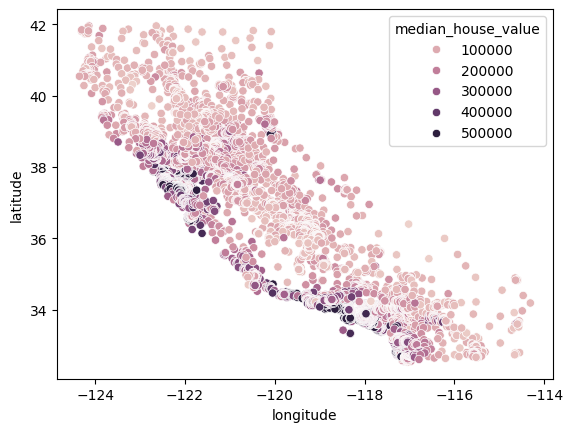

In [ ]:
# look at the data 
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [12]:
# we need to noramlize the data for k-means clustering because it uses distance; thus we want to keep in the same scale
# use normalize() to maintain the angles and directions comparable. StandardScaler() is when the entire dataset is standardized, normalize = row-wise
X_train, X_test, y_train, y_test = train_test_split(
    home_data[['latitude', 'longitude']], 
    home_data[['median_house_value']], 
    test_size = 0.33, 
    random_state= 123 
    ) 


# norm
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

In [18]:
# initialize the model
kmeans_model = KMeans(
    n_clusters = 3, 
    random_state= 0 , 
    n_init = 'auto' # how many times the entire algo will run with different initial centroid seeds. 
    )

kmeans_model.fit(X_train_norm)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


<Axes: xlabel='longitude', ylabel='latitude'>

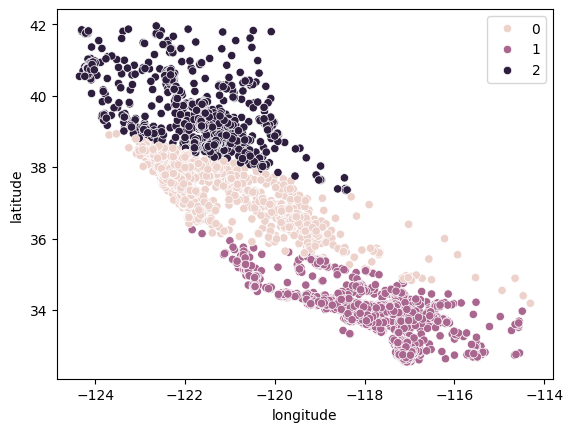

In [ ]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans_model.labels_)

# split into three different groups - Northern California, Central California, and Southern California

<Axes: ylabel='median_house_value'>

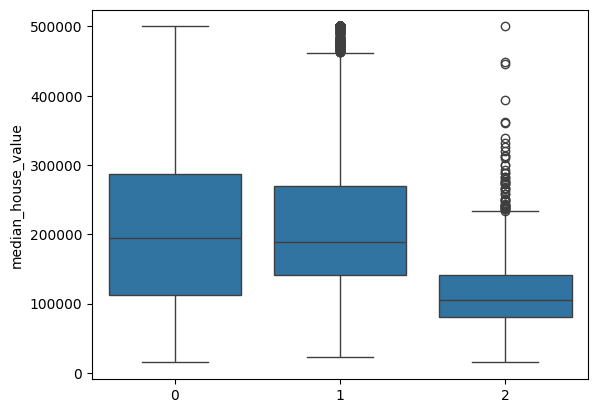

In [ ]:
sns.boxplot(x = kmeans_model.labels_, y = y_train['median_house_value'])

# southern california seems to have the lowest variance with a ton of outliers 


In [ ]:
silhouette_score(X_train_norm, kmeans_model.labels_, metric='euclidean')

0.749578912040651

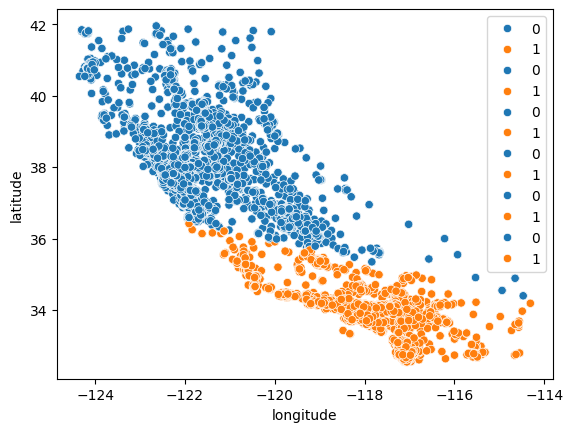

In [ ]:
# Find the best K 

K = range(2, 8)
fits = []
score = []

for k in K: 
    model = KMeans(
        n_clusters=k,
        random_state=0, 
        n_init='auto'
    ).fit(X_train_norm)

    fits.append(model)

    score.append(silhouette_score(X_train_norm, model.labels_, metric = 'euclidean'))


<Axes: xlabel='longitude', ylabel='latitude'>

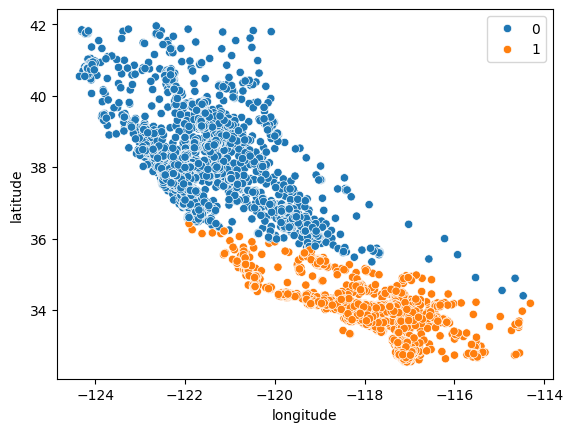

In [26]:
# k = 2
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

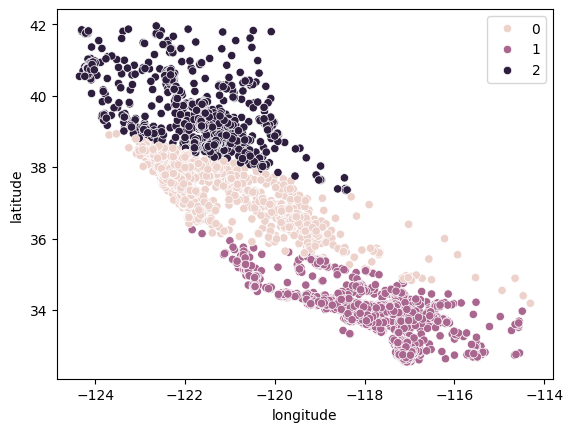

In [27]:
# k = 3
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[1].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

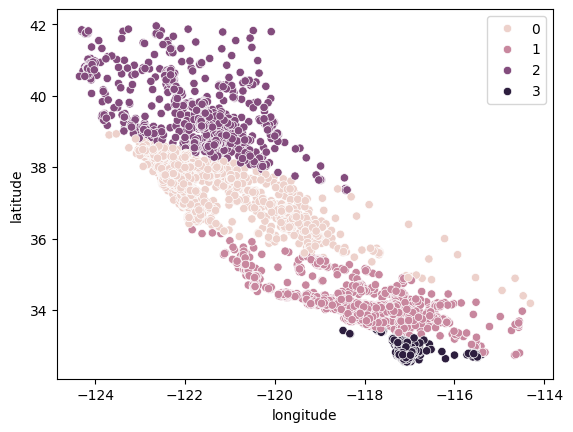

In [28]:
# k = 4
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

<Axes: >

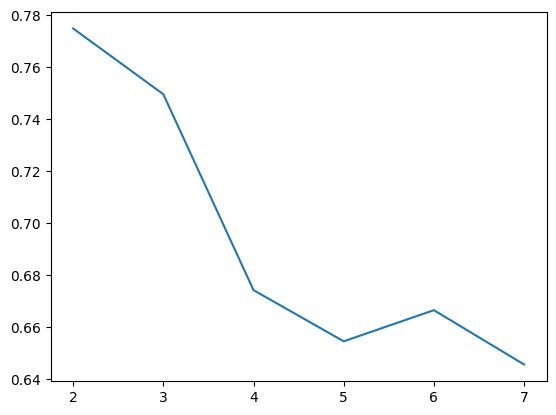

In [29]:
sns.lineplot(x = K, y = score)


KMeans(n_clusters=5, random_state=0)


<Axes: ylabel='median_house_value'>

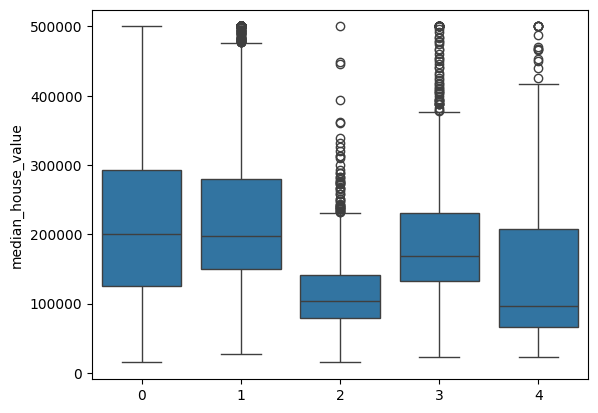

In [31]:
# pick k = 5, lowest distance without experiencing a bump
print(fits[3])
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])